# **Project Name**    - Retail Sales Prediction(Rossmann)




##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Chetan Gode


# **Project Summary -**

                Rossmann operates over 3000 drug store in 7 European countries. Currently Rossmann Store Manager are tasked with predicting their daily sales for up to six week in advance. Store sales are influenced by many factors, including Promotions,Competition, School and State holidays,Seasonality and locality.with thousand individual managers predicting sales based on their unique circumstances,the accuracy of results can be quite varied. 
                We have provided with historical sales data fo 1115 rossmann store and task is to forecast Sales

# **GitHub Link -**

https://github.com/chetansgode/Rossmann_Retail_Sales_prediction.git

# **Problem Statement**


* **we have historical sales data for 1115 rossmann store and task is to forecast Sales and note that some store in dataset were temporary closed for refurbishment.**

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np  #importing numpy library
import pandas as pd  #importing pandas library

# for visualisation import matplotlib and seaborn
import matplotlib.pyplot as plt  
%matplotlib inline
%lsmagic
import seaborn as sns

#importing sklearn packages for ml

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,RidgeCV
from sklearn.linear_model import Lasso ,LassoCV
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
df_store=pd.read_csv('C:/Users/Admin/Downloads/store (1).csv')
df_sales=pd.read_csv('C:/Users/Admin/Downloads/Rossmann Stores Data (1).csv',parse_dates=['Date'])

### Dataset First View

In [3]:
# Dataset First Look for store
df_store.head()


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
# Dataset First Look for Sales
df_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count

df_store.shape


(1115, 10)

In [6]:
df_sales.shape

(1017209, 9)

### Dataset Information

In [7]:
# Dataset Info for store
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [8]:
# Dataset Info for Sales
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count for Store
df_store.duplicated().sum()

0

In [10]:
# Dataset Duplicate Value Count for Sales
df_sales.duplicated().sum()

0

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count for Store data
for i in df_store.columns:
    print( i,' has null value : ',df_store[i].isna().sum())
    

Store  has null value :  0
StoreType  has null value :  0
Assortment  has null value :  0
CompetitionDistance  has null value :  3
CompetitionOpenSinceMonth  has null value :  354
CompetitionOpenSinceYear  has null value :  354
Promo2  has null value :  0
Promo2SinceWeek  has null value :  544
Promo2SinceYear  has null value :  544
PromoInterval  has null value :  544


In [12]:
# Missing Values/Null Values Count for Sales data
for i in df_sales.columns:
    print( i,' has null value : ',df_sales[i].isna().sum())   #no missing value in Sales data 

Store  has null value :  0
DayOfWeek  has null value :  0
Date  has null value :  0
Sales  has null value :  0
Customers  has null value :  0
Open  has null value :  0
Promo  has null value :  0
StateHoliday  has null value :  0
SchoolHoliday  has null value :  0


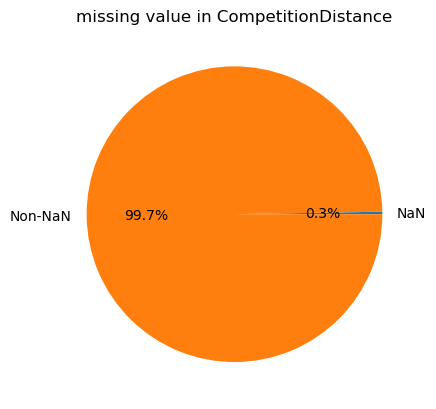

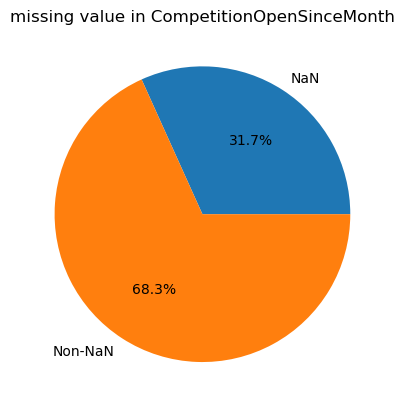

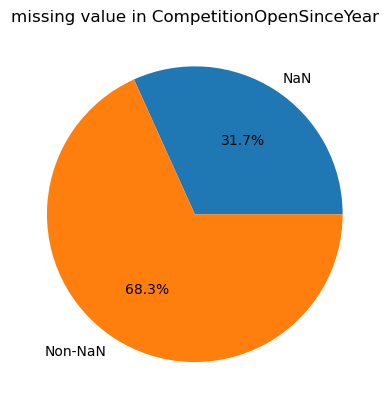

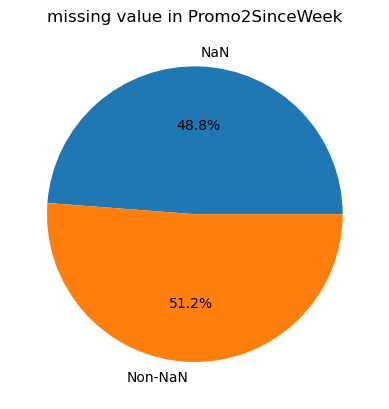

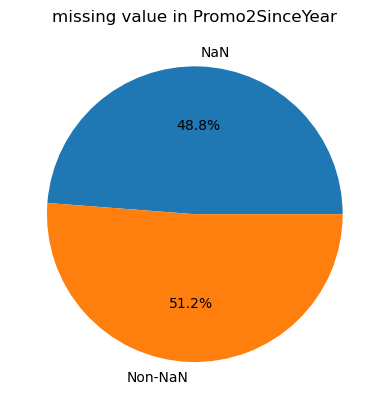

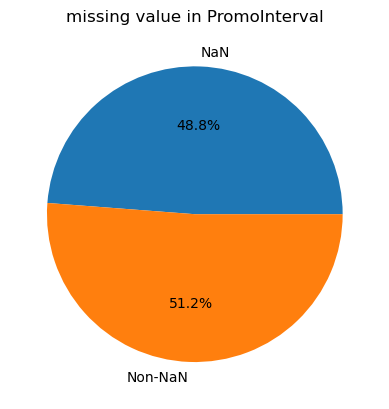

In [13]:
# Visualizing the missing values for store data

for i in df_store.columns:
    plt.gca()
    # Calculate the counts of NaN and non-NaN values
    na_count = df_store[i].isna().sum()
    non_na_count = df_store[i].notna().sum()
    
    if na_count != 0: #To visualize only na value chart.

        # Create a list of values
        values = [na_count, non_na_count]

        # Create labels for the pie chart
        labels = ['NaN', 'Non-NaN']

        # Plot the pie chart
        plt.pie(values, labels=labels , autopct='%.1f%%')
        plt.title(f'missing value in {i}')

        # Display the chart
        plt.show()

    

### What did you know about your dataset?

Answer Here
* In Sales data :-
** Not present any duplicate data and missing value too.
* In Store data:-
** Not present any duplicate data but there have many missing data in features.

## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns for sales

df_sales.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [15]:
# Dataset Columns for store
df_store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [16]:
# Dataset Describe for sales
df_sales.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [17]:
# Dataset Describe for store
df_store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Variables Description


* store-Store_id
* Sales-Sales made for the day
* Customers - Footfall for the day
* Open-Open or close
* StateHoliday- State holiday or not 
* SchoolHoliday - School holiday or not 
* StoreType - Types of store
* Assortment-Type of assortment
* CompetitionDistance-Distance from nearest competition
* Promo- Store running promotion or not
* Promo2-Store running consecutive promotion or not
* PromoInterval-Promotion intervals


### Merge Data set (Available)


In [18]:
#merge 2 data file on store by left joining

df=pd.merge(df_store,df_sales,how='left',on='Store')
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


In [19]:
df.shape

(1017209, 18)

In [20]:
#store column no need for further calculation so drop it
df.drop('Store',axis=1,inplace=True)
df.shape

(1017209, 17)

### Check Unique Values for each variable.

In [21]:
# Check Unique Values for each variable (no unique value,unique value,unique value count)

for n,i in enumerate( df.columns):
    no_unique_values = df[i].nunique()
    unique_values =df[i].unique()
    unique_value_counts =df[i].value_counts()
    print(f"{n+1}- for {i} column No of unique values is :- \n{no_unique_values},\n unique values is:-\n{unique_values},\n No of unique value counts:-\n{unique_value_counts}")


1- for StoreType column No of unique values is :- 
4,
 unique values is:-
['c' 'a' 'd' 'b'],
 No of unique value counts:-
a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64
2- for Assortment column No of unique values is :- 
3,
 unique values is:-
['a' 'c' 'b'],
 No of unique value counts:-
a    537445
c    471470
b      8294
Name: Assortment, dtype: int64
3- for CompetitionDistance column No of unique values is :- 
654,
 unique values is:-
[1.270e+03 5.700e+02 1.413e+04 6.200e+02 2.991e+04 3.100e+02 2.400e+04
 7.520e+03 2.030e+03 3.160e+03 9.600e+02 1.070e+03 1.300e+03 4.110e+03
 3.270e+03 5.000e+01 1.384e+04 3.240e+03 2.340e+03 5.500e+02 1.040e+03
 4.060e+03 4.590e+03 4.300e+02 2.300e+03 6.000e+01 1.200e+03 2.170e+03
 4.000e+01 9.800e+03 2.910e+03 1.320e+03 2.240e+03 7.660e+03 5.400e+02
 4.230e+03 1.090e+03 2.600e+02 1.800e+02 1.180e+03 2.900e+02 4.880e+03
 9.710e+03 2.700e+02 1.060e+03 1.801e+04 6.260e+03 1.057e+04 4.500e+02
 3.036e+04 7.170e+03 7.200e+02 

8- for Promo2SinceYear column No of unique values is :- 
7,
 unique values is:-
[  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.],
 No of unique value counts:-
2011.0    115056
2013.0    110464
2014.0     79922
2012.0     73174
2009.0     65270
2010.0     56240
2015.0      9052
Name: Promo2SinceYear, dtype: int64
9- for PromoInterval column No of unique values is :- 
3,
 unique values is:-
[nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec'],
 No of unique value counts:-
Jan,Apr,Jul,Oct     293122
Feb,May,Aug,Nov     118596
Mar,Jun,Sept,Dec     97460
Name: PromoInterval, dtype: int64
10- for DayOfWeek column No of unique values is :- 
7,
 unique values is:-
[5 4 3 2 1 7 6],
 No of unique value counts:-
5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64
11- for Date column No of unique values is :- 
942,
 unique values is:-
['2015-07-31T00:00:00.000000000' '2015-07-30T00:00:00.000000000'
 '2015-07-29T00:00:00.0000000

12- for Sales column No of unique values is :- 
21734,
 unique values is:-
[ 5263  5020  4782 ... 20362 18841 21237],
 No of unique value counts:-
0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
19268         1
18344         1
17685         1
19544         1
21237         1
Name: Sales, Length: 21734, dtype: int64
13- for Customers column No of unique values is :- 
4086,
 unique values is:-
[ 555  546  523 ... 3727 4022 4106],
 No of unique value counts:-
0       172869
560       2414
576       2363
603       2337
571       2330
         ...  
4587         1
4115         1
4931         1
4440         1
4106         1
Name: Customers, Length: 4086, dtype: int64
14- for Open column No of unique values is :- 
2,
 unique values is:-
[1 0],
 No of unique value counts:-
1    844392
0    172817
Name: Open, dtype: int64
15- for Promo column No of unique values is :- 
2,
 unique values is:-
[1 0],
 No of unique value counts:-
0    629129
1    3880

In [22]:
Stateholiday_before=df['StateHoliday'].unique()
df['StateHoliday'].replace({'0':0},inplace=True)
StateHoliday_after=df['StateHoliday'].unique()
print('Stateholiday_before ',Stateholiday_before)
print('StateHoliday_after ',StateHoliday_after)

Stateholiday_before  ['0' 'a' 'b' 'c' 0]
StateHoliday_after  [0 'a' 'b' 'c']


## 3. ***Data Wrangling***

### Data Wrangling Code

 Write your code to make your dataset analysis ready.

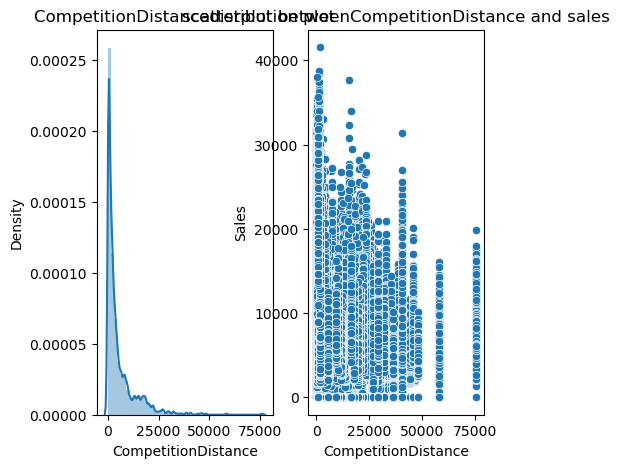

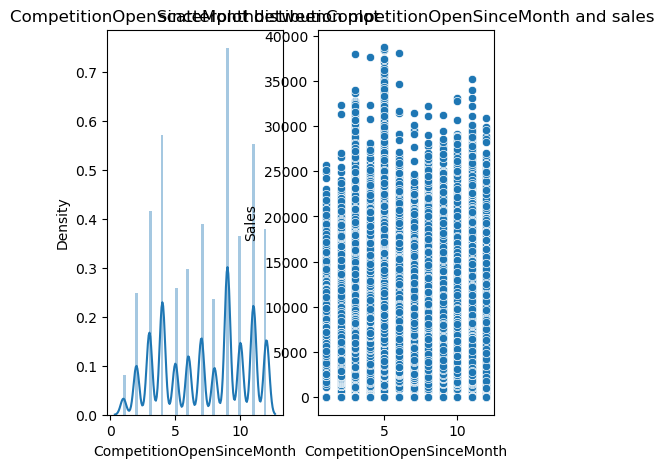

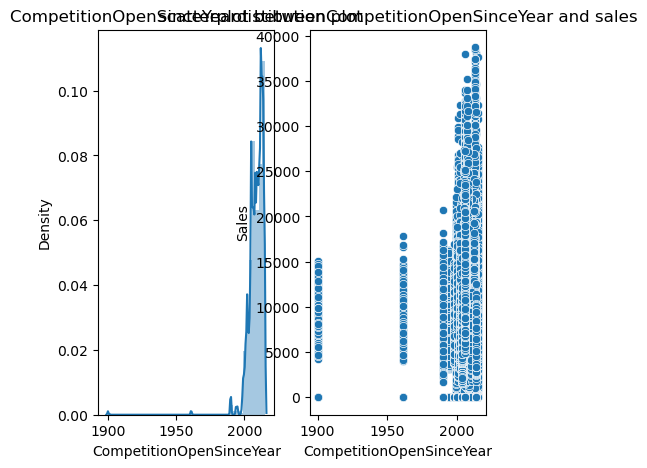

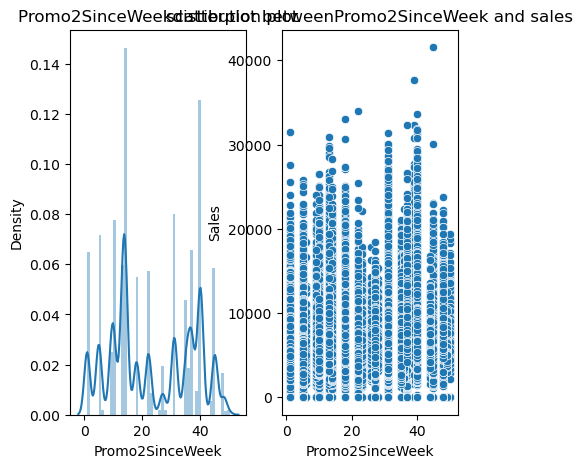

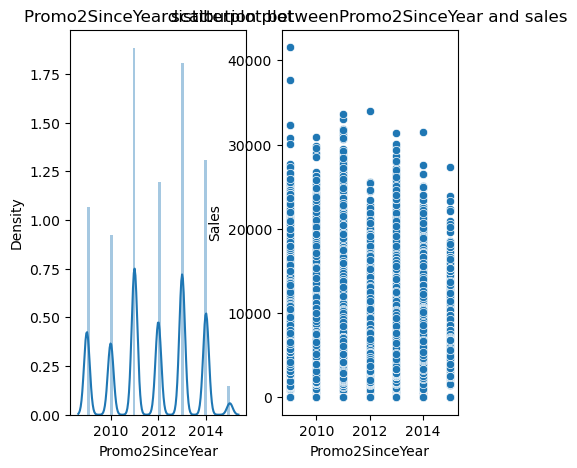

In [23]:
# Firstly We will replace all null value
for i in ['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear']:
    plt.figure(figsize=(5,5))
    plt.subplot(1,2,1)
    sns.distplot(df[i],bins=50)
    plt.title(i + 'distibution plot')
    plt.subplot(1,2,2)
    sns.scatterplot(x=df[i],y=df['Sales'],data=df)
    plt.title('scatterplot between' + i + " and sales" )

    plt.show()

In [24]:
# Replace CompetitionDistance none value with median value because right skew data
df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(),inplace=True)

In [25]:
# Replace all other null features data with 0

for i in ['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval']:
    df[i].fillna(0,inplace=True)
        

In [26]:
# See final  data if any null data present or not

for i in df.columns:
    print( i,' has null value : ',df[i].isna().sum())

StoreType  has null value :  0
Assortment  has null value :  0
CompetitionDistance  has null value :  0
CompetitionOpenSinceMonth  has null value :  0
CompetitionOpenSinceYear  has null value :  0
Promo2  has null value :  0
Promo2SinceWeek  has null value :  0
Promo2SinceYear  has null value :  0
PromoInterval  has null value :  0
DayOfWeek  has null value :  0
Date  has null value :  0
Sales  has null value :  0
Customers  has null value :  0
Open  has null value :  0
Promo  has null value :  0
StateHoliday  has null value :  0
SchoolHoliday  has null value :  0


### What all manipulations have you done and insights you found?

Answer Here.
We know that some feature has null value so replaced it as following.
*  CompetitionDistance  has null value :  3           by median value
*  CompetitionOpenSinceMonth  has null value :  354   by 0
*  CompetitionOpenSinceYear  has null value :  354    by 0
*  Promo2SinceWeek  has null value :  544             by 0
*  Promo2SinceYear  has null value :  544             by 0
*  PromoInterval  has null value :  544               by 0


## ***4. Data Visualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1-check sales with respect to store type and then assortment

In [27]:
print(df.groupby(['StoreType'])['Sales'].mean().sort_values(ascending=True))
print('--'*20)
print(df.groupby(['Assortment'])['Sales'].mean().sort_values(ascending=True))
print('--'*20)
print(df.groupby(['StoreType','Assortment'])['Sales'].mean().unstack())

StoreType
d     5641.819243
c     5723.629246
a     5738.179710
b    10058.837334
Name: Sales, dtype: float64
----------------------------------------
Assortment
a    5481.026096
c    6058.676567
b    8553.931999
Name: Sales, dtype: float64
----------------------------------------
Assortment             a            b             c
StoreType                                          
a            5398.858310          NaN   6310.867032
b           10821.619806  8553.931999  17969.556263
c            5647.174314          NaN   5805.782193
d            5317.885943          NaN   5826.407660


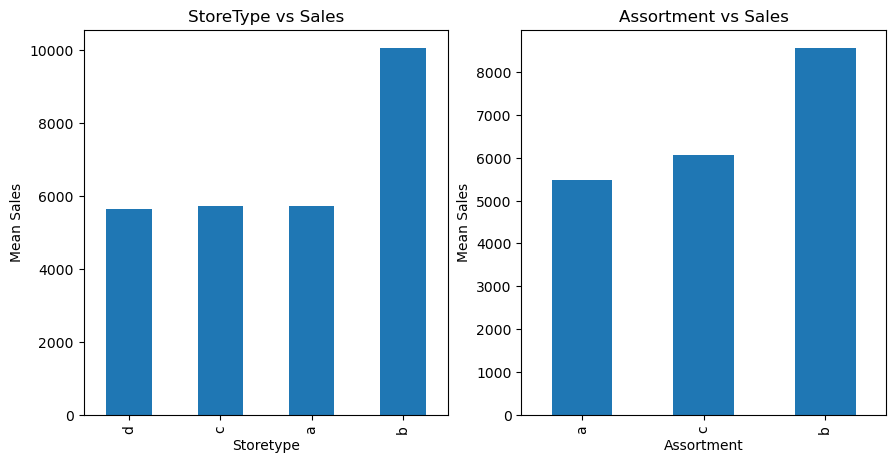

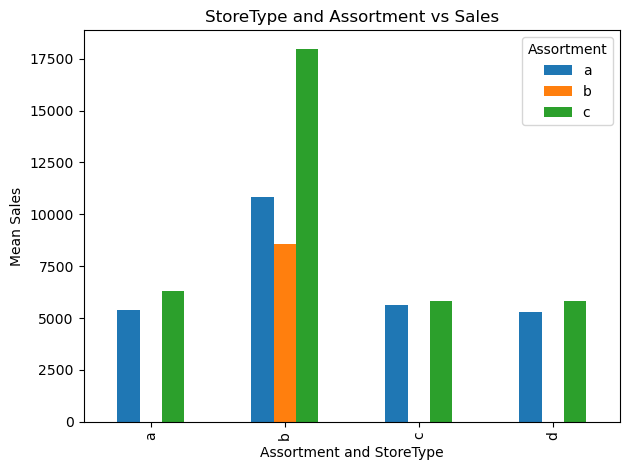

In [28]:
# Chart - 1 visualization code-check sales with respect to store type and then assortment
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
df.groupby(['StoreType'])['Sales'].mean().sort_values(ascending=True).plot(kind='bar')
plt.title("StoreType vs Sales")
plt.xlabel('Storetype')
plt.ylabel('Mean Sales')


plt.subplot(1,3,2)
df.groupby(['Assortment'])['Sales'].mean().sort_values(ascending=True).plot(kind='bar')
plt.title("Assortment vs Sales")
plt.xlabel('Assortment')
plt.ylabel('Mean Sales')

plt.subplot(1,3,2)
df.groupby(['StoreType','Assortment'])['Sales'].mean().unstack().plot(kind='bar')
plt.title('StoreType and Assortment vs Sales')
plt.xlabel('Assortment and StoreType')
plt.ylabel('Mean Sales')

plt.tight_layout()  # Adjust spacing between subplots

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
* To Visualize data easily

##### 2. What is/are the insight(s) found from the chart?

Answer Here
* StoreType b has highest sales among all and assortment b has highest sales
* StoreType b is selling highest amount of assortment c and lowest b
* Assortment b is only available in StoreType b

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
* Yes
* Assortment b only available in store type b need to available to another store too.

In [29]:
df.columns

Index(['StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'DayOfWeek',
       'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

#### Chart - 2-Check Sales with respect to Distances

In [62]:
# Categorised the distance into 3 buckets because there are two many distances
"""
Distance <2000 :- 0 (min)
Distance > 4000 :- 2 (max)
distance in between 2000 and 4000 :- 1 (med)"""

df['distance']=df['CompetitionDistance'].apply(lambda x :0 if x<2000 else(1 if 2000<=x>4000 else 2 ))

# No need of CompetitionDistance columns now so drop it.
df.drop('CompetitionDistance',axis=1,inplace=True)


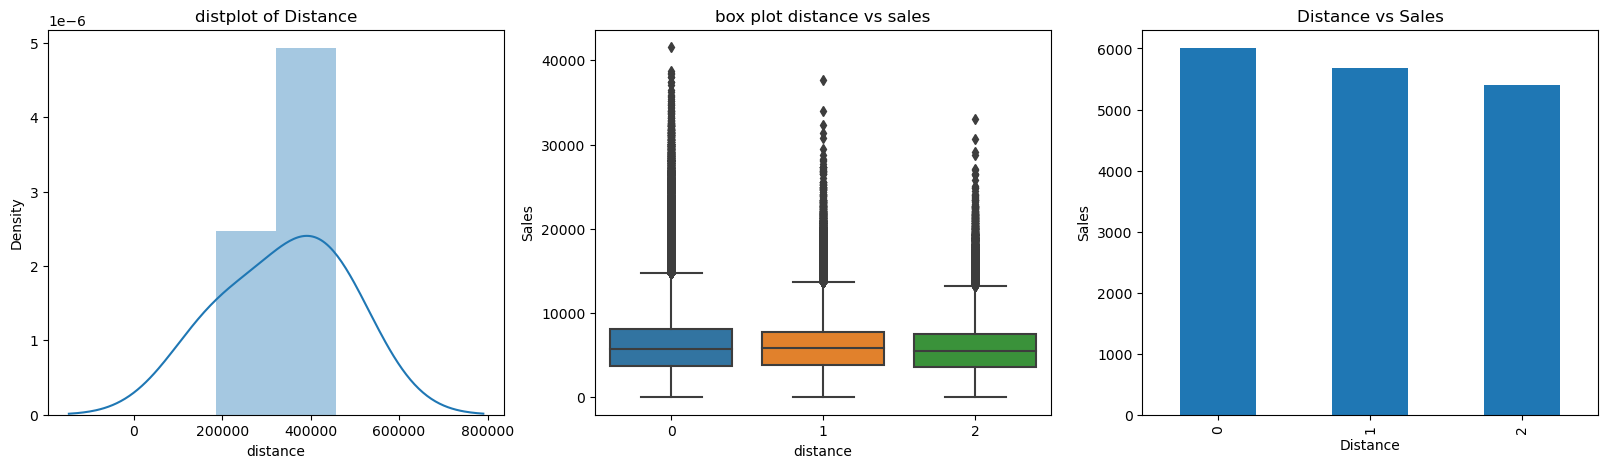

In [58]:
# Chart - 2 visualization code
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.distplot(df['distance'].value_counts(),hist=True)
plt.title('distplot of Distance')

plt.subplot(1,3,2)
sns.boxplot(x=df['distance'],y=df['Sales'])
plt.title('box plot distance vs sales')

plt.subplot(1,3,3)
df.groupby('distance')['Sales'].mean().plot(kind='bar')
plt.title('Distance vs Sales')
plt.xlabel('Distance')
plt.ylabel('Sales')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.
* To check sales distribution

##### 2. What is/are the insight(s) found from the chart?

Answer Here
* With minimum (0) or  competition distance less than 2000 then sales is highest and as distance increase sales go down

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
* With less competition distance sales is highest as compare to midum and max distance

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***